In [22]:
%pylab inline 
# 그림을 그리기 위한 환경 자동 구축 명령어 (magic command)

Populating the interactive namespace from numpy and matplotlib


# 혐오 표현 분류하기 : 다중 분류 문제

한국어 혐오표현(Korean HateSpeech) 데이터셋을 사용해 혐오 표현인지 아닌지 분류를 해보겠습니다.

데이터셋 : https://github.com/kocohub/korean-hate-speech

# 데이터 불러오기

In [23]:
import pandas as pd

In [24]:
df = pd.read_csv("https://raw.githubusercontent.com/kocohub/korean-hate-speech/master/labeled/train.tsv", sep="\t")

In [25]:
df

,comments,contain_gender_bias,bias,hate
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,False,others,hate
1,....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...,False,none,none
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",False,none,hate
3,"1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데",False,none,none
4,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,True,gender,hate
...,...,...,...,...
7891,힘내세요~ 응원합니다!!,False,none,none
7892,힘내세요~~삼가 고인의 명복을 빕니다..,False,none,none
7893,힘내세용 ^^ 항상 응원합니닷 ^^ !,False,none,none
7894,힘내소...연기로 답해요.나도 53살 인데 이런일 저런일 다 있더라구요.인격을 믿습...,False,none,none


In [26]:
df['hate'].unique()

array(['hate', 'none', 'offensive'], dtype=object)

In [27]:
df['bias'].unique()

array(['others', 'none', 'gender'], dtype=object)

In [28]:
df['contain_gender_bias'].unique()

array([False,  True])

hate 컬럼에는 'hate', 'none', 'offensive'가 있네요.   
각각이 무엇을 의미하는지 출력해 볼까요?

In [29]:
df[df['hate'] == 'hate']

,comments,contain_gender_bias,bias,hate
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,False,others,hate
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",False,none,hate
4,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,True,gender,hate
6,"100년안에 남녀간 성전쟁 한번 크게 치룬 후 일부다처제, 여성의 정치참여 금지, ...",True,gender,hate
19,180이하 호빗 한남들은 결혼 하지마셈 ㅋ 돈없으면 연애도 하지마셈 ㅋ 니들 호빗 ...,True,gender,hate
...,...,...,...,...
7864,흑발미녀???장난똥때리냐?????마녀란 말도 아깝다!!!,False,others,hate
7879,히잌! 기저귀 찬 년들이 군대 군대 주댕이 털고 자빠졌노ㅋ( ° ͜ʖ͡°)╭∩╮,True,gender,hate
7880,히트곡이 없는데 추억팔이가되는 놀라운 조선식 방송국연예매니징ㅋㅋ 기획사 소속사 걍 ...,False,others,hate
7881,"히트작이래봐야 미사, 발리 두개 정도가 다고 연기력도 그저 그런 수준으로 배우로서 ...",False,none,hate


In [30]:
df[df['hate'] == 'offensive']

,comments,contain_gender_bias,bias,hate
8,10년만에 재미를 느끼는 프로였는데왜 니들때문에 폐지를해야되냐,False,none,offensive
9,10년차방탄팬인데 우리방탄처럼 성공은못하겠지만 일단 방탄의 부하가되고싶다는거니 이름...,False,none,offensive
13,1400억 뜯기고 얼마나 억울 했을꼬 뒤질만큼 아플만 하지~~~~ㅋㅋㅋㅋ,False,none,offensive
15,15살차이면 어릴때사고쳤으면 딸벌인데 ㅋㅋ 능력좋네 전현무 여자들이 전현무스타일이 ...,False,others,offensive
23,1년연예 ㅋㅋ 2년봅니다....,False,none,offensive
...,...,...,...,...
7859,휴.. 연하남? 이종석이 결정했다면 보기야 하겠지만 스토리보니 여주위주 또 남주는 ...,True,gender,offensive
7862,흐아아아암 잘잤다,False,none,offensive
7872,흥국아 오래 살았다 아이가,False,none,offensive
7877,히든싱어도 끝났다...예전에 비해 가수의 레벨이 너무 떨어짐.,False,none,offensive


In [31]:
df[df['hate'] == 'none']

,comments,contain_gender_bias,bias,hate
1,....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...,False,none,none
3,"1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데",False,none,none
5,10+8 진짜 이승기랑 비교된다,False,none,none
7,10년뒤 윤서인은 분명히 재평가될것임. 말하나하나가 틀린게없음,False,none,none
10,10살 차이가 넘을텐데 부부라고? 무슨 내용인지 긍금하네..,False,others,none
...,...,...,...,...
7891,힘내세요~ 응원합니다!!,False,none,none
7892,힘내세요~~삼가 고인의 명복을 빕니다..,False,none,none
7893,힘내세용 ^^ 항상 응원합니닷 ^^ !,False,none,none
7894,힘내소...연기로 답해요.나도 53살 인데 이런일 저런일 다 있더라구요.인격을 믿습...,False,none,none


단어들은 저 자체로 쓸 수 없기 때문에 숫자로 바꾸어 주어야 합니다.

먼저 데이터셋을 입력변수 X와 목표변수 y로 분리해 보죠.

## X 값 준비하기

In [32]:
X = df['comments']

한국어 문장을 숫자로 바꾸기 위해서, 무엇을 숫자로 바꿀 것인지 결정해야 합니다.   
만약 띄어쓰기를 기준으로 덩어리마다 숫자로 바꾼다면 다음과 같이 각각의 문장을 리스트로 변형합니다.

형태소 분석을 하겠습니다.

In [33]:
pip install konlpy

In [34]:
from konlpy.tag import Okt

In [35]:
okt = Okt()

morphs는 형태소 단위로 구문 분석을 수행합니다

In [36]:
okt.morphs(X[0])

['(',
 '현재',
 '호텔',
 '주인',
 '심정',
 ')',
 '아',
 '18',
 '난',
 '마른하늘',
 '에',
 '날벼락',
 '맞고',
 '호텔',
 '망하게',
 '생겼는데',
 '누',
 '군',
 '계속',
 '추모',
 '받네',
 '....']

nouns는 명사만 추출해 줍니다. 띄어쓰기를 안하거나 명사를 마구잡이로 연결해서 써도 추출이 잘 됩니다.

In [37]:
okt.nouns(X[0])

['현재', '호텔', '주인', '심정', '난', '마른하늘', '날벼락', '호텔', '누', '계속', '추모']

phrases는 어절만 추출해 줍니다

In [38]:
okt.phrases(X[0])

['현재',
 '현재 호텔주인',
 '현재 호텔주인 심정',
 '18',
 '18 난',
 '18 난 마른하늘',
 '날벼락',
 '호텔',
 '누군',
 '누군 계속',
 '누군 계속 추모',
 '주인',
 '심정',
 '마른하늘',
 '계속',
 '추모']

pos는 형태소 단위로 쪼갠 후 각 품사들을 태깅해서 리스트 형태로 반환해 줍니다.

In [39]:
okt.pos(X[0], norm=True)

[('(', 'Punctuation'),
 ('현재', 'Noun'),
 ('호텔', 'Noun'),
 ('주인', 'Noun'),
 ('심정', 'Noun'),
 (')', 'Punctuation'),
 ('아', 'Exclamation'),
 ('18', 'Number'),
 ('난', 'Noun'),
 ('마른하늘', 'Noun'),
 ('에', 'Josa'),
 ('날벼락', 'Noun'),
 ('맞고', 'Verb'),
 ('호텔', 'Noun'),
 ('망하게', 'Adjective'),
 ('생겼는데', 'Verb'),
 ('누', 'Noun'),
 ('군', 'Suffix'),
 ('계속', 'Noun'),
 ('추모', 'Noun'),
 ('받네', 'Verb'),
 ('....', 'Punctuation')]

이 중 명사 추출 방식으로 해보겠습니다.

진행상황을 보기 위해 tqdm 을 사용합니다.

In [40]:
pip install tqdm

In [41]:
from tqdm import tqdm

In [42]:
newX = []
for sentence in tqdm(X):
    newX.append(
        okt.nouns(sentence)
    )

100%|██████████| 7896/7896 [00:32<00:00, 244.32it/s]


In [43]:
newX

[['현재', '호텔', '주인', '심정', '난', '마른하늘', '날벼락', '호텔', '누', '계속', '추모'],
 ['한국', '미인', '대표', '분', '곱', '모습', '모습', '뒤', '슬픔', '미처'],
 ['남', '고통', '젠', '처벌', '래야', '사회'],
 ['화', '화', '갈수록'],
 ['사람', '얼굴', '손톱', '인격', '살해', '동영상', '몰카', '메걸', '리안', '생각'],
 ['진짜', '이승기', '비교'],
 ['남녀',
  '전쟁',
  '한번',
  '크게',
  '치룬',
  '후',
  '일부다처제',
  '여성',
  '정치',
  '참여',
  '금지',
  '여성',
  '투표',
  '삭제',
  '세계',
  '공통',
  '문화',
  '자리',
  '암탉',
  '댐'],
 ['윤서인', '재', '평가', '임'],
 ['재미', '프로', '왜', '니', '때문', '폐지'],
 ['우리', '방탄', '성공', '일단', '방탄', '부하', '이름', '기억', '해'],
 ['살', '차이', '부부', '무슨', '내용', '긍금하'],
 ['결혼', '성수', '기지', '여름', '속'],
 ['살', '차이', '요즘', '세상', '일도'],
 ['얼마나', '억울'],
 ['아들', '유모차'],
 ['살', '차이', '때', '사고', '딸벌', '능력', '전현무', '여자', '전현무', '스타일'],
 ['다이어트', '건강', '위해', '더', '야다', '더', '마르', '봄'],
 ['진짜', '것', '사랑', '도저히', '납득'],
 ['정도', '기럭지', '애', '의심', '의', '구심', '듬', '비율', '함'],
 ['이하',
  '호빗',
  '한남',
  '결혼',
  '셈',
  '돈',
  '연애',
  '셈',
  '니',
  '호빗',
  '유전자',
  '고통',
  '네',
  '후손',
  

위에서 만든 덩어리들을 숫자로 변환하기 위해서 라이브러리 `gensim`을 사용하겠습니다.

In [44]:
!pip install gensim

In [45]:
from gensim.corpora import Dictionary

In [46]:
dictionary = Dictionary(newX)

변수 dictionary에 각각의 단어에 숫자로된 id 값이 들어가 있음을 확인할 수 있습니다.

In [47]:
dictionary.token2id

{'계속': 0,
 '난': 1,
 '날벼락': 2,
 '누': 3,
 '마른하늘': 4,
 '심정': 5,
 '주인': 6,
 '추모': 7,
 '현재': 8,
 '호텔': 9,
 '곱': 10,
 '대표': 11,
 '뒤': 12,
 '모습': 13,
 '미인': 14,
 '미처': 15,
 '분': 16,
 '슬픔': 17,
 '한국': 18,
 '고통': 19,
 '남': 20,
 '래야': 21,
 '사회': 22,
 '젠': 23,
 '처벌': 24,
 '갈수록': 25,
 '화': 26,
 '동영상': 27,
 '리안': 28,
 '메걸': 29,
 '몰카': 30,
 '사람': 31,
 '살해': 32,
 '생각': 33,
 '손톱': 34,
 '얼굴': 35,
 '인격': 36,
 '비교': 37,
 '이승기': 38,
 '진짜': 39,
 '공통': 40,
 '금지': 41,
 '남녀': 42,
 '댐': 43,
 '문화': 44,
 '삭제': 45,
 '세계': 46,
 '암탉': 47,
 '여성': 48,
 '일부다처제': 49,
 '자리': 50,
 '전쟁': 51,
 '정치': 52,
 '참여': 53,
 '치룬': 54,
 '크게': 55,
 '투표': 56,
 '한번': 57,
 '후': 58,
 '윤서인': 59,
 '임': 60,
 '재': 61,
 '평가': 62,
 '니': 63,
 '때문': 64,
 '왜': 65,
 '재미': 66,
 '폐지': 67,
 '프로': 68,
 '기억': 69,
 '방탄': 70,
 '부하': 71,
 '성공': 72,
 '우리': 73,
 '이름': 74,
 '일단': 75,
 '해': 76,
 '긍금하': 77,
 '내용': 78,
 '무슨': 79,
 '부부': 80,
 '살': 81,
 '차이': 82,
 '결혼': 83,
 '기지': 84,
 '성수': 85,
 '속': 86,
 '여름': 87,
 '세상': 88,
 '요즘': 89,
 '일도': 90,
 '억울': 91,
 '얼마

In [48]:
len(dictionary)

9940

변수 dictionary는 각 덩어리(term) 마다 고유한 숫자 id를 지정한 역할을 합니다.   
그럼 우리가 사용할 데이터 안에 저 덩어리들이 몇 개 들어 있는지 개수를 세어 보겠습니다.

In [49]:
X[0]

'(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속 추모받네....'

In [50]:
newX[0]

['현재', '호텔', '주인', '심정', '난', '마른하늘', '날벼락', '호텔', '누', '계속', '추모']

In [51]:
print(newX[0])
print(sorted(newX[0]))
dictionary.doc2bow(newX[0])

['현재', '호텔', '주인', '심정', '난', '마른하늘', '날벼락', '호텔', '누', '계속', '추모']
['계속', '난', '날벼락', '누', '마른하늘', '심정', '주인', '추모', '현재', '호텔', '호텔']


[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 2)]

In [52]:
print(newX[220])
print(sorted(newX[220]))
dictionary.doc2bow(newX[220])

['재미', '지네', '진흙탕', '속']
['속', '재미', '지네', '진흙탕']


[(66, 1), (86, 1), (879, 1), (880, 1)]

In [53]:
dictionary[458]

'강'

In [54]:
dictionary[1674]

'여자애'

In [55]:
dictionary[1675]

'접근'

In [56]:
dictionary.doc2bow(["2018년도","(현재", "계속"])

[(0, 1)]

In [57]:
dictionary[0]

'계속'

In [58]:
dictionary[10]

'곱'

In [59]:
dictionary[1676]

'겉'

그럼 이제 덩어리들을 숫자로 바꾸어서 문장 대신 넣겠습니다.

In [60]:
dictionary.token2id['현재']

8

이런 식으로 덩어리를 숫자 아이디로 바꾸어 줄거에요.

In [61]:
finalX = []
for sentence in newX:
    temp = []
    for term in sentence:
        temp.append(dictionary.token2id[term])
    finalX.append(temp)

In [62]:
finalX[:5]

[[8, 9, 6, 5, 1, 4, 2, 9, 3, 0, 7],
 [18, 14, 11, 16, 10, 13, 13, 12, 17, 15],
 [20, 19, 23, 24, 21, 22],
 [26, 26, 25],
 [31, 35, 34, 36, 32, 27, 30, 29, 28, 33]]

그런데 혹시 결측치가 있을지도 모릅니다 (빈 리스트)

In [63]:
for idx, row in enumerate(finalX):
    if len(row) == 0:
        print(idx)

23
28
38
53
93
105
125
390
481
500
873
1006
1037
1140
1294
1627
1660
1669
1671
1677
1684
1687
1699
1701
1830
1923
2138
2175
2207
2211
2371
3099
3149
3226
3233
3800
3818
3884
3907
3921
4135
4234
4461
4776
4777
4993
4995
4996
5004
5143
5260
5319
5403
5470
5521
5805
5841
5844
5845
5850
5855
5856
6241
6272
6286
6342
6347
6348
6353
6786
6788
6809
7094
7114
7474
7479
7673


이 위치의 데이터는 모두 버려야 겠네요..

저 위치를 저장하고 지워주겠습니다.

In [64]:
target_delete = []

for idx, row in enumerate(finalX):
    if len(row) == 0:
        target_delete.append(idx)

In [65]:
target_delete[-10:]

[6348, 6353, 6786, 6788, 6809, 7094, 7114, 7474, 7479, 7673]

In [66]:
len(finalX)

7896

In [67]:
finalX = np.delete(finalX, target_delete)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [68]:
len(finalX)

7819

이따 잊지 말고 y에서도 지워주세요!

이제 X 값을 vectorize 합니다.

In [69]:
len(dictionary)

9940

이 dictionary의 크기를 차원(dimension)으로 설정해 줍니다

In [70]:
def vectorize_sequences(sequences, dimension=9940):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [71]:
# X 데이터 벡터 변환
finalX = vectorize_sequences(finalX)

In [72]:
finalX

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
finalX.shape

(7819, 9940)

### 몇 개나 들어 있을까?

어떤 덩어리가 데이터에 몇 개나 들어 있는지 한 번 세어볼까요?   
기본 내장 라이브러리 collections 을 이용해 셀 수 있습니다.

In [74]:
from collections import Counter

In [75]:
temp = []
for sent in newX:
    temp += sent

In [76]:
count = Counter(temp)

In [77]:
len(count)

9940

In [78]:
count.most_common(50)

[('여자', 542),
 ('사람', 540),
 ('왜', 484),
 ('진짜', 409),
 ('좀', 385),
 ('남자', 317),
 ('더', 288),
 ('뭐', 272),
 ('때', 268),
 ('애', 257),
 ('이', 250),
 ('결혼', 240),
 ('거', 235),
 ('그냥', 233),
 ('연기', 228),
 ('말', 228),
 ('드라마', 215),
 ('얼굴', 210),
 ('돈', 210),
 ('생각', 193),
 ('기사', 193),
 ('것', 191),
 ('연예인', 183),
 ('나', 167),
 ('이제', 160),
 ('보고', 156),
 ('방송', 150),
 ('또', 150),
 ('댓글', 149),
 ('니', 147),
 ('안', 146),
 ('정말', 145),
 ('저', 143),
 ('하나', 142),
 ('나이', 138),
 ('난', 137),
 ('개', 136),
 ('임', 129),
 ('욕', 129),
 ('살', 125),
 ('그', 125),
 ('배우', 125),
 ('응원', 125),
 ('정도', 124),
 ('지금', 119),
 ('내', 117),
 ('한국', 114),
 ('남', 114),
 ('해', 114),
 ('무슨', 113)]

## y 값 준비하기

이제 레이블이 될 값을 살펴 보겠습니다.

In [79]:
df.head(3)

,comments,contain_gender_bias,bias,hate
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,False,others,hate
1,....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...,False,none,none
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",False,none,hate


우리는 hate 값을 사용할 겁니다.

In [80]:
y = df['hate']

- `hate`는 1
- `offensive`는 2
- `none`은 0

으로 바꿔보겠습니다

In [81]:
y.replace('hate', 1)

0          1
1       none
2          1
3       none
4          1
        ... 
7891    none
7892    none
7893    none
7894    none
7895    none
Name: hate, Length: 7896, dtype: object

잘 바뀌는 군요. 이걸 y 값에 덮어 씌어 줍니다.

In [82]:
y = y.replace('hate', 1)

이제 나머지 두 개도 값을 바꿔 주겠습니다.

In [83]:
y = y.replace('offensive', 2)
y = y.replace('none', 0)

In [84]:
y

0       1
1       0
2       1
3       0
4       1
       ..
7891    0
7892    0
7893    0
7894    0
7895    0
Name: hate, Length: 7896, dtype: int64

X에서 지웠던 인덱스를 똑같이 지워주겠습니다

In [85]:
y = np.delete(y.values, target_delete)

이제 Scikit-learn의 `train_test_split` 함수를 사용해서 데이터셋을 손쉽게 무작위로 나눠보겠습니다.

In [86]:
from sklearn.model_selection import train_test_split

이제 전체 데이터에서 훈련 데이터셋은 80%, 테스트 데이터셋은 20%로 만들겠습니다

In [87]:
X_train, X_test, y_train, y_test = train_test_split(finalX, y, test_size=0.2)

In [88]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [89]:
y_train

array([2, 2, 2, ..., 2, 1, 1])

2차 분할로 훈련 데이터셋과 검증 데이터셋을 만듭니다.

In [90]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

데이터가 몇 개씩 있는지 확인해 보겠습니다

In [91]:
len(X_train)

5004

In [92]:
len(X_val)

1251

In [93]:
len(X_test)

1564

# 원핫인코딩

y 값의 레이블 0, 1, 2를 원-핫 인코딩으로 바꾸겠습니다.

`원-핫 인코딩`이 범주형 데이터에 널리 사용되기 때문에 `범주형 인코딩`이라고도 부릅니다.   
이 경우 레이블의 원-핫 인코딩은 각 레이블의 인덱스 자리는 1이고 나머지는 모두 0인 벡터입니다

In [94]:
from keras.utils import np_utils

In [95]:
nb_classes = 3  # 클래스의 총 개수

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_val = np_utils.to_categorical(y_val, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [96]:
y_train

array([2, 0, 2, ..., 0, 2, 2])

In [97]:
Y_train

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

# 모델 구성

In [98]:
from keras.models import Sequential  # Keras의 시퀀셜 모델
from keras.layers.core import Dense, Dropout, Activation # 모델에서 사용할 레이어 형태

아까 덩어리의 개수가 `9940`개인 것을 확인했습니다.   
그것을 입력 사이즈로 넣어줍니다.

In [99]:
model = Sequential()
model.add(Dense(768, input_shape=(9940,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))

In [100]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 768)               7634688   
_________________________________________________________________
activation (Activation)      (None, 768)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               196864    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 1

In [101]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [102]:
history = model.fit(X_train,
                    Y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(X_val, Y_val)
                   )

Epoch 1/10
10/10 [==============================] - 18s 434ms/step - loss: 1.0823 - accuracy: 0.4360 - val_loss: 1.0337 - val_accuracy: 0.4500
Epoch 2/10
10/10 [==============================] - 3s 331ms/step - loss: 0.9008 - accuracy: 0.5764 - val_loss: 0.9376 - val_accuracy: 0.5420
Epoch 3/10
10/10 [==============================] - 3s 333ms/step - loss: 0.5030 - accuracy: 0.8496 - val_loss: 1.1266 - val_accuracy: 0.5444
Epoch 4/10
10/10 [==============================] - 4s 372ms/step - loss: 0.1850 - accuracy: 0.9400 - val_loss: 1.5718 - val_accuracy: 0.5516
Epoch 5/10
10/10 [==============================] - 3s 332ms/step - loss: 0.0710 - accuracy: 0.9773 - val_loss: 1.9503 - val_accuracy: 0.5436
Epoch 6/10
10/10 [==============================] - 3s 332ms/step - loss: 0.0356 - accuracy: 0.9905 - val_loss: 2.2741 - val_accuracy: 0.5308
Epoch 7/10
10/10 [==============================] - 3s 328ms/step - loss: 0.0234 - accuracy: 0.9925 - val_loss: 2.4968 - val_accuracy: 0.5404
Epoch

손실과 정확도 곡선을 그려 보죠

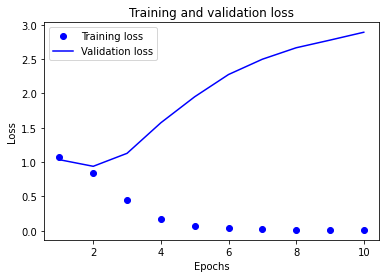

In [103]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

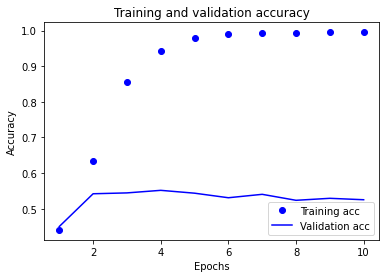

In [104]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

테스트 데이터셋에 대해 성능을 평가해 보겠습니다

In [105]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

49/49 [==============================] - 1s 16ms/step - loss: 3.0175 - accuracy: 0.5013
Test score: 3.0174946784973145
Test accuracy: 0.5012787580490112


51%네요.. 앞으로 어떻게 해야 할까요? 😭

# 분류 리포트를 생성하는 방법

라이브러리 Scikit-learn을 이용해 여러 척도들을 리포트 형태로 출력해 볼 수 있습니다.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [106]:
from sklearn.metrics import classification_report

In [107]:
Y_pred = model.predict(X_test, batch_size=64, verbose=1)
Y_pred_bool = np.argmax(Y_pred, axis=1)

print(
    classification_report(np.argmax(Y_test, axis=1), Y_pred_bool, target_names=['none', 'hate', 'offensive'])
)

25/25 [==============================] - 1s 24ms/step
              precision    recall  f1-score   support

        none       0.59      0.65      0.62       676
        hate       0.48      0.34      0.40       386
   offensive       0.39      0.43      0.41       502

    accuracy                           0.50      1564
   macro avg       0.49      0.47      0.47      1564
weighted avg       0.50      0.50      0.50      1564



# LSTM 모델 구성

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import SpatialDropout1D

In [109]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

## x 값 가져오기

In [110]:
new_df = pd.DataFrame(data={'comments': newX, })
new_df['comments'] = new_df['comments'].apply(lambda x: " ".join(x))
new_df

,comments
0,현재 호텔 주인 심정 난 마른하늘 날벼락 호텔 누 계속 추모
1,한국 미인 대표 분 곱 모습 모습 뒤 슬픔 미처
2,남 고통 젠 처벌 래야 사회
3,화 화 갈수록
4,사람 얼굴 손톱 인격 살해 동영상 몰카 메걸 리안 생각
...,...
7891,응원
7892,고인 명복
7893,항상 응원 합 닷
7894,연기 답 살 일 일 인격 홨팅


## y 값 가져오기

In [111]:
new_df['hate'] = df['hate'].replace(['hate', 'offensive', 'none'], [1, 2, 0])
new_df

,comments,hate
0,현재 호텔 주인 심정 난 마른하늘 날벼락 호텔 누 계속 추모,1
1,한국 미인 대표 분 곱 모습 모습 뒤 슬픔 미처,0
2,남 고통 젠 처벌 래야 사회,1
3,화 화 갈수록,0
4,사람 얼굴 손톱 인격 살해 동영상 몰카 메걸 리안 생각,1
...,...,...
7891,응원,0
7892,고인 명복,0
7893,항상 응원 합 닷,0
7894,연기 답 살 일 일 인격 홨팅,0


In [112]:
new_df['hate'].value_counts()

0    3486
2    2499
1    1911
Name: hate, dtype: int64

In [113]:
y = pd.get_dummies(new_df['hate']).values
y

array([[0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

## 문장 길이 파악

In [114]:
new_df['comments'].apply(lambda x: len(x))

0       33
1       26
2       15
3        7
4       30
        ..
7891     2
7892     5
7893     9
7894    16
7895     4
Name: comments, Length: 7896, dtype: int64

count    7896.000000
mean        6.637031
std         4.887535
min         1.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        31.000000
Name: comments, dtype: float64

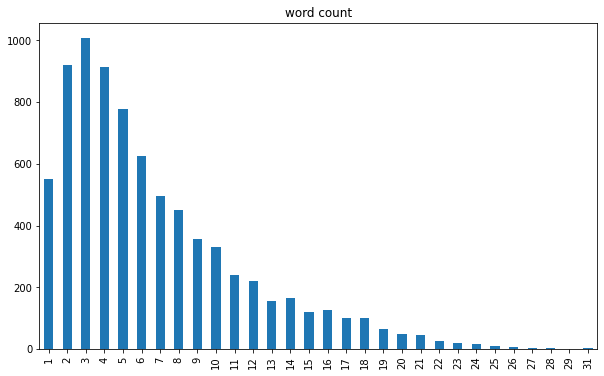

In [115]:
new_df['comments'].apply(lambda x: len(x.split(" "))).value_counts().sort_index().plot(kind='bar', figsize=(10, 6), title='word count');
new_df['comments'].apply(lambda x: len(x.split(" "))).describe()

count    1911.000000
mean        8.114600
std         5.373286
min         1.000000
25%         4.000000
50%         7.000000
75%        11.000000
max        29.000000
Name: comments, dtype: float64

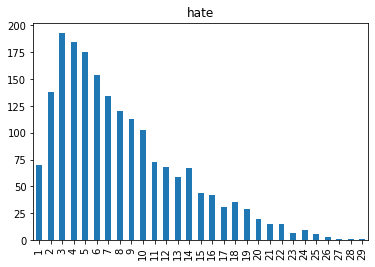

In [116]:
new_df.query('hate == 1')['comments'].apply(lambda x: len(x.split(" "))).value_counts().sort_index().plot(kind='bar', title='hate')
new_df.query('hate == 1')['comments'].apply(lambda x: len(x.split(" "))).describe()

count    2499.000000
mean        6.828331
std         4.838271
min         1.000000
25%         3.000000
50%         5.000000
75%         9.000000
max        28.000000
Name: comments, dtype: float64

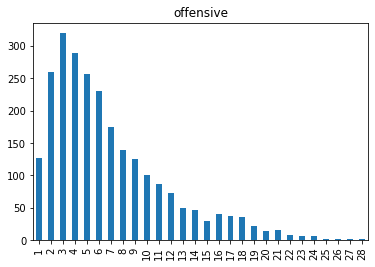

In [117]:
new_df.query('hate == 2')['comments'].apply(lambda x: len(x.split(" "))).value_counts().sort_index().plot(kind='bar', title='offensive')
new_df.query('hate == 2')['comments'].apply(lambda x: len(x.split(" "))).describe()

count    3486.000000
mean        5.689902
std         4.403722
min         1.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        31.000000
Name: comments, dtype: float64

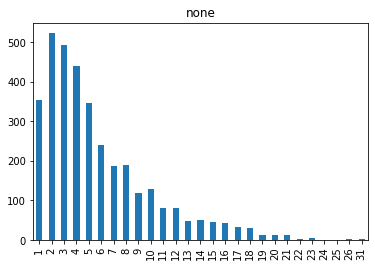

In [118]:
new_df.query('hate == 0')['comments'].apply(lambda x: len(x.split(" "))).value_counts().sort_index().plot(kind='bar', title='none')
new_df.query('hate == 0')['comments'].apply(lambda x: len(x.split(" "))).describe()

## word to index

In [119]:
tokenizer = Tokenizer(1000)
tokenizer.fit_on_texts(new_df['comments'])
len(tokenizer.word_index)

9940

In [120]:
for idx, data in enumerate(tokenizer.word_index.items()):
    print(data)

    if idx == 1500:
        break

('여자', 1)
('사람', 2)
('왜', 3)
('진짜', 4)
('좀', 5)
('남자', 6)
('더', 7)
('뭐', 8)
('때', 9)
('애', 10)
('이', 11)
('결혼', 12)
('거', 13)
('그냥', 14)
('연기', 15)
('말', 16)
('드라마', 17)
('얼굴', 18)
('돈', 19)
('생각', 20)
('기사', 21)
('것', 22)
('연예인', 23)
('나', 24)
('이제', 25)
('보고', 26)
('방송', 27)
('또', 28)
('댓글', 29)
('니', 30)
('안', 31)
('정말', 32)
('저', 33)
('하나', 34)
('나이', 35)
('난', 36)
('개', 37)
('임', 38)
('욕', 39)
('살', 40)
('그', 41)
('배우', 42)
('응원', 43)
('정도', 44)
('지금', 45)
('내', 46)
('한국', 47)
('남', 48)
('해', 49)
('무슨', 50)
('역시', 51)
('문제', 52)
('놈', 53)
('인생', 54)
('요즘', 55)
('보기', 56)
('엄마', 57)
('얘', 58)
('팬', 59)
('남편', 60)
('사랑', 61)
('걸', 62)
('자기', 63)
('도', 64)
('둘', 65)
('못', 66)
('때문', 67)
('얼마나', 68)
('년', 69)
('악플', 70)
('분', 71)
('누구', 72)
('이혼', 73)
('일', 74)
('건', 75)
('게', 76)
('인간', 77)
('기자', 78)
('이해', 79)
('누가', 80)
('노래', 81)
('다시', 82)
('관심', 83)
('너', 84)
('제발', 85)
('집', 86)
('딸', 87)
('죄', 88)
('프로', 89)
('군대', 90)
('예능', 91)
('녀', 92)
('축하', 93)
('앞', 94)
('사진', 95)
('잘못

In [121]:
tokenizer.word_counts['대가']

6

In [122]:
X = tokenizer.texts_to_sequences(df['comments'])
X = pad_sequences(X, maxlen=10, padding='post')
X.shape

(7896, 10)

In [123]:
y = np.array(new_df['hate'])
y

array([1, 0, 1, ..., 0, 0, 0])

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=159)

In [138]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7106, 10) (790, 10)
(7106,) (790,)


In [126]:
LSTM_model = Sequential()
LSTM_model.add(Embedding(1000, 16, input_length=10))
LSTM_model.add(SpatialDropout1D(0.1))
LSTM_model.add(LSTM(32, dropout=0.2))
# LSTM_model.add(Dense(128, activation='relu'))
# LSTM_model.add(Dropout(0.3))
# LSTM_model.add(Dense(32, activation='relu'))
# LSTM_model.add(Dropout(0.1))
LSTM_model.add(Dense(3, activation='softmax'))

LSTM_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [139]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1545)

epoch_list, val_loss, loss, acc, val_acc = [], [], [], [], []

for idx, (i, _) in enumerate(cv.split(X, y)):
    history = LSTM_model.fit(
            X[i],
            to_categorical(y[i]),
            epochs=10,
            batch_size=16,
            validation_split=0.1,
            callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)]
        )
    
    epoch_list.extend(history.epoch)
    val_loss.extend(history.history['val_loss'])
    loss.extend(history.history['loss'])
    acc.extend(history.history['acc'])
    val_acc.extend(history.history['val_acc'])

Epoch 1/10
356/356 [==============================] - 2s 6ms/step - loss: 0.9166 - acc: 0.5549 - val_loss: 1.2111 - val_acc: 0.4446
Epoch 2/10
356/356 [==============================] - 2s 6ms/step - loss: 0.9023 - acc: 0.5630 - val_loss: 1.2481 - val_acc: 0.4699
Epoch 3/10
356/356 [==============================] - 2s 6ms/step - loss: 0.9003 - acc: 0.5672 - val_loss: 1.2580 - val_acc: 0.4509
Epoch 4/10
356/356 [==============================] - 2s 6ms/step - loss: 0.8942 - acc: 0.5681 - val_loss: 1.2539 - val_acc: 0.4541
Epoch 1/10
356/356 [==============================] - 2s 6ms/step - loss: 0.9121 - acc: 0.5594 - val_loss: 1.2262 - val_acc: 0.4604
Epoch 2/10
356/356 [==============================] - 2s 6ms/step - loss: 0.8992 - acc: 0.5650 - val_loss: 1.3120 - val_acc: 0.4699
Epoch 3/10
356/356 [==============================] - 2s 6ms/step - loss: 0.8977 - acc: 0.5704 - val_loss: 1.2705 - val_acc: 0.4589
Epoch 4/10
356/356 [==============================] - 2s 6ms/step - loss: 0.

In [140]:
score = LSTM_model.evaluate(X_test, to_categorical(y_test))
print('Test score:', round(score[0], 3))
print('Test accuracy:', round(score[1], 3))

25/25 [==============================] - 0s 2ms/step - loss: 0.9138 - acc: 0.5709
Test score: 0.914
Test accuracy: 0.571


In [129]:
# model.save(f'/content/gdrive/MyDrive/Ulsan_univ/data/model/BEEP-nouns-DNN-TextClassification_{round(score[1], 3)}')

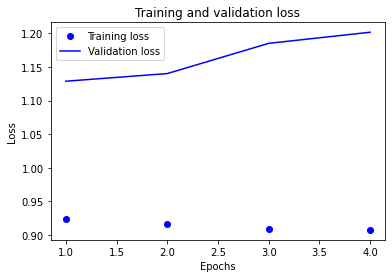

In [130]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

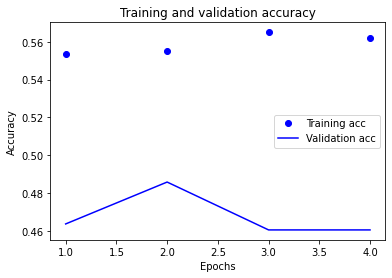

In [131]:
plt.clf()   # 그래프를 초기화합니다

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [132]:
import plotly.figure_factory as ff

In [133]:
def confusion_matrix(model, X_test, y_test):
    confusion_df = pd.DataFrame(columns=range(0, 3), index=range(0, 3)).fillna(0)
    prediction = model.predict(X_test)

    for pred, y in tqdm(zip(prediction, y_test)):
        confusion_df[y.argmax()][pred.argmax()] += 1

    label_dict = {num: val for num, val in zip(range(0, 3), ['none', 'hate', 'offensive'])}
    confusion_modified = confusion_df.rename(columns=label_dict, index=label_dict)

    fig = ff.create_annotated_heatmap(confusion_df.values,
                                      colorscale='amp',
                                      x=['none', 'hate', 'offensive'],
                                      y=['none', 'hate', 'offensive'])
    fig.show()

In [137]:
confusion_matrix(LSTM_model, X_test, to_categorical(y_test))

790it [00:00, 11884.74it/s]


## index - model이 예측한 값
## column - 실제 값
## (어두울수록 큰 값)